In [ ]:
! pip install statannotations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
matplotlib.rcParams['figure.dpi'] = 300
sns.set_style("dark")

# Main Findings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_folder_path = f'/content/drive/MyDrive/FAI/EMNLP-Paper/btqe'
data = pd.read_csv(data_folder_path + "/btqe.csv")

In [ ]:
data = pd.read_csv("/content/emergency_discharge.csv")

In [ ]:
print(data.columns.tolist())

['Condition', 'ResponseId', 'Baseline_1', 'Baseline_confidence_1', 'Baseline_2', 'Baseline_confidence_2', 'Baseline_3', 'Baseline_confidence_3', 'Baseline_4', 'Baseline_confidence_4', 'Baseline_5', 'Baseline_confidence_5', 'Baseline_6', 'Baseline_confidence_6', 'Baseline_7', 'Baseline_confidence_7', 'Baseline_8', 'Baseline_confidence_8', 'Baseline_9', 'Baseline_confidence_9', 'Baseline_10', 'Baseline_confidence_10', 'Baseline_11', 'Baseline_confidence_11', 'Baseline_12', 'Baseline_confidence_12', 'Baseline_13', 'Baseline_confidence_13', 'Baseline_14', 'Baseline_confidence_14', 'Baseline_15', 'Baseline_confidence_15', 'Baseline_16', 'Baseline_confidence_16', 'Baseline_17', 'Baseline_confidence_17', 'Baseline_18', 'Baseline_confidence_18', 'Baseline_19', 'Baseline_confidence_19', 'Baseline_20', 'Baseline_confidence_20', 'Baseline_21', 'Baseline_confidence_21', 'Baseline_22', 'Baseline_confidence_22', 'Baseline_23', 'Baseline_confidence_23', 'Baseline_24', 'Baseline_confidence_24', 'Basel

In [ ]:
correct_answers = ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
clinical_risk = ["mildly significant", "moderately significant", "mildly significant", "moderately significant", "moderately significant", "mildly significant", "mildly significant", "mildly significant", "clinically insignificant", "mildly significant", "clinically insignificant", "clinically insignificant", "mildly significant",  "clinically insignificant", "clinically insignificant", "clinically insignificant", "highly significant", "mildly significant", "clinically insignificant", "moderately significant", "clinically insignificant", "clinically insignificant", "moderately significant", "clinically insignificant", "moderately significant", "life-threatening", "clinically insignificant", "highly significant"]

In [ ]:
from collections import Counter
Counter(correct_answers)

Counter({'Yes': 15, 'No': 13})

# Main Finding 1

In [ ]:
# Correct Reliance - Physician say yes/no and answer is yes/no
# Incorrect Reliance - Physician say no/yes and answer is yes/no

In [ ]:
def correct_answers_mean(data, correct_answers, val=None):
  if val == None:
    count_column = data.eq(correct_answers).mean(axis=1)
  else:
    # select only yes or no
    select_correct_answers = [x==val for x in correct_answers]
    count_column = (data.eq(correct_answers) & select_correct_answers).mean(axis=1)
  return count_column

In [ ]:
data["Baseline (Accuracy)"] = correct_answers_mean(data[["Baseline_{}".format(i) for i in range(1, 29)]], correct_answers) *100
data["Experiment (Accuracy)"] = correct_answers_mean(data[["Experiment_{}".format(i) for i in range(1, 29)]], correct_answers) *100

In [ ]:
# by physician - sanity check
for group_name, group_df in data[["Condition", "Experiment (Accuracy)", "Baseline (Accuracy)"]].groupby("Condition"):
  print(group_name, group_df.mean(axis=0))

BT Experiment (Accuracy)    55.408163
Baseline (Accuracy)      56.224490
dtype: float64
QE Experiment (Accuracy)    61.309524
Baseline (Accuracy)      57.142857
dtype: float64


<ipython-input-11-59e027add2fe>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(group_name, group_df.mean(axis=0))
<ipython-input-11-59e027add2fe>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(group_name, group_df.mean(axis=0))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:7.340e-02 t=-1.823e+00
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:6.994e-01 t=3.878e-01
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:6.946e-01 t=-3.944e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:5.553e-03 t=-2.872e+00


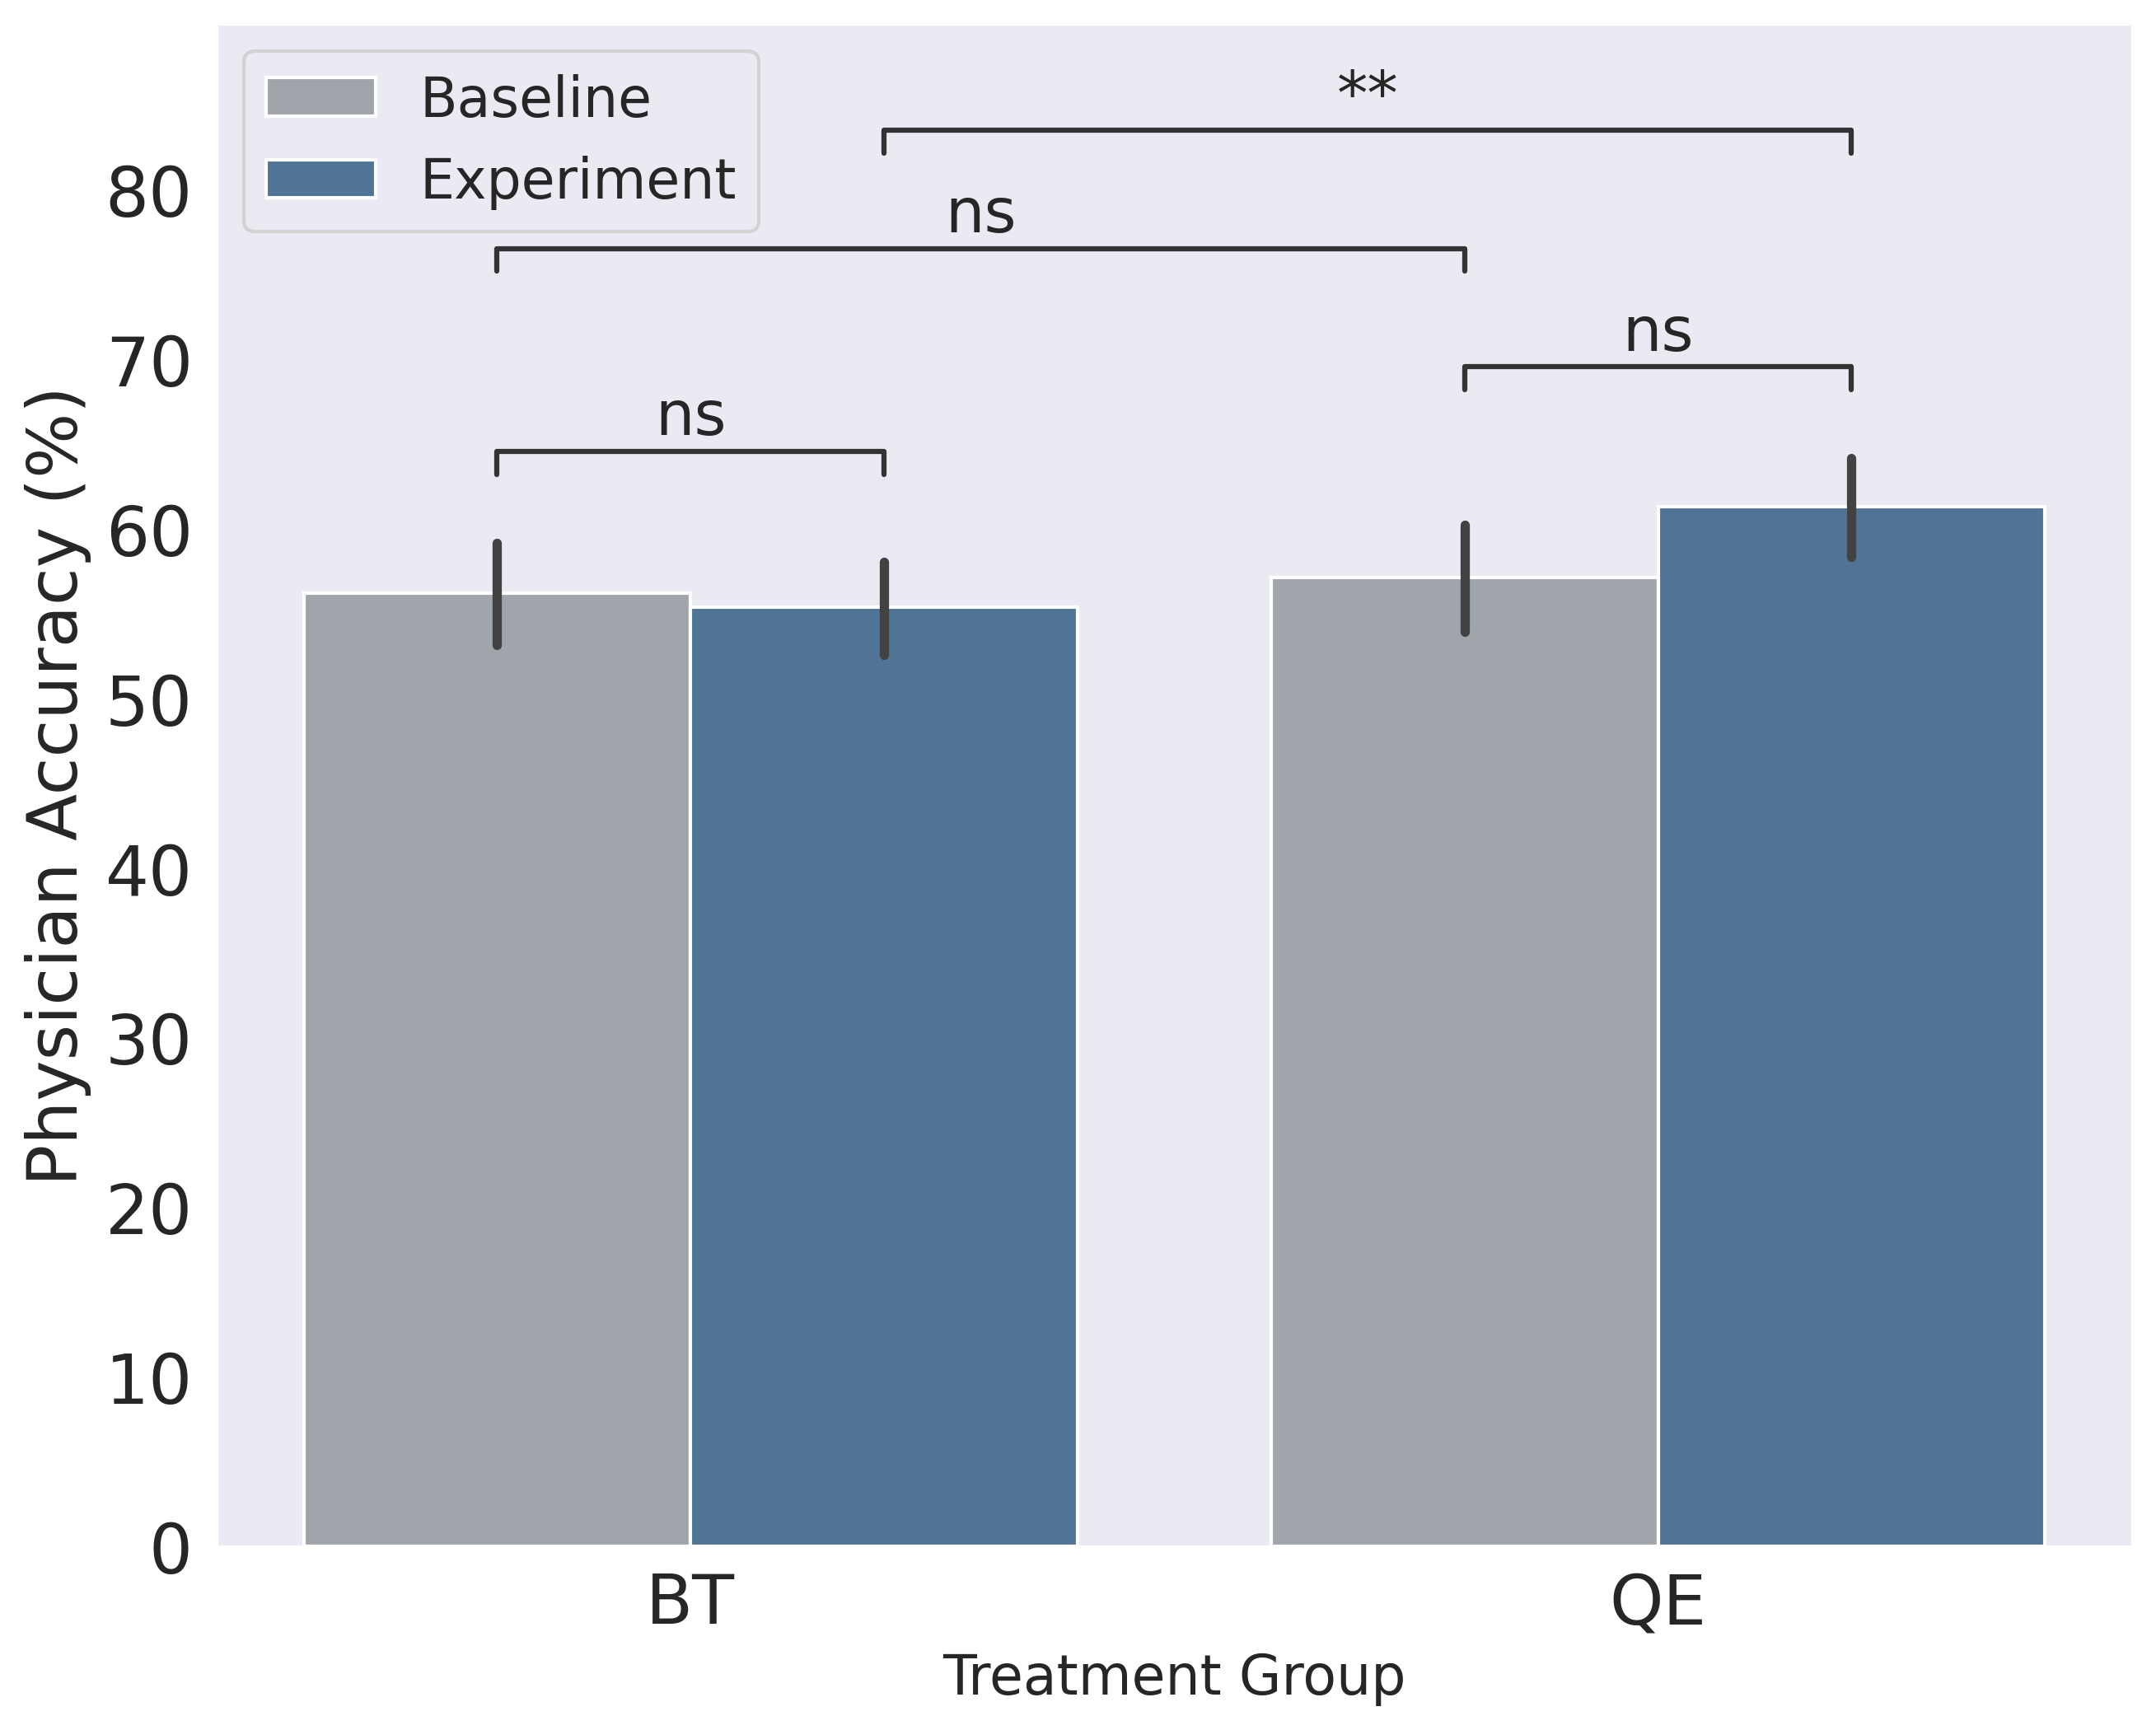

In [ ]:
from statannotations.Annotator import Annotator

sub_data = data[["Condition", "Baseline (Accuracy)", "Experiment (Accuracy)"]]
sub_data.columns = ["Condition", "Baseline", "Experiment"]

accuracy_phy_df = pd.melt(
    sub_data,
    id_vars=["Condition"],
    var_name="Group",
    value_name="Accuracy"
)

plt.figure(figsize=(10, 8))
clrs = ['#9ea5ad', '#4374a2', '#9ea5ad', '#d68121']
ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Accuracy', hue='Group', palette=clrs)

pairs = [((xval, "Baseline"), (xval, "Experiment")) for xval in ["BT", "QE"]]
pairs += [(("BT", yval), ("QE", yval)) for yval in ["Baseline", "Experiment"]]

annotator = Annotator(ax, pairs, data=accuracy_phy_df, x="Condition", y="Accuracy", hue="Group", order=["BT", "QE"])
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator._pvalue_format.fontsize = 18
annotator.apply_and_annotate()

plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.xticks(fontsize=20)

plt.xlabel(xlabel="Treatment Group", fontsize=16)
plt.ylabel(ylabel="Physician Accuracy (%)",fontsize=20)
plt.show()

# Main Finding - Weighted Accuracy

In [ ]:
from scipy import stats
from statannotations.Annotator import Annotator

In [ ]:
# weighted scoring - From Niloufar's code
def calculate_overall_score(data, correct_answer, confidence_data):
    overall_score = pd.Series(0, index=data.index)  # Initialize overall score to zero
    for idx, row in data.iterrows():  # Iterate over each row
        i = 0
        for col in row.index:
            if row[col] == correct_answer[i]:  # Check condition
                overall_score[idx] += confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Add to overall score
            else:
                overall_score[idx] -= confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Subtract from overall score
            i += 1
    return overall_score

In [ ]:
# confidence weighted count

data["Baseline (Weighted Score)"] = calculate_overall_score(data[["Baseline_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Baseline_confidence_{}".format(i) for i in range(1, 29)]])
data["Experiment (Weighted Score)"] = calculate_overall_score(data[["Experiment_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Experiment_confidence_{}".format(i) for i in range(1, 29)]])

# confidence weighted accuracy

data[f"Baseline (Weighted Accuracy)"] = (100*data[f"Baseline (Weighted Score)"])/28
data[f"Experiment (Weighted Accuracy)"] = (100*data[f"Experiment (Weighted Score)"])/28

In [ ]:
data[["Condition", "Baseline (Weighted Accuracy)",  "Experiment (Weighted Accuracy)"]].groupby("Condition").mean()

,Baseline (Weighted Accuracy),Experiment (Weighted Accuracy)
Condition,,
BT,7.938776,8.693878
QE,11.261905,19.642857


In [ ]:
data[["Condition", "Baseline (Weighted Accuracy)", "Experiment (Weighted Accuracy)"]].groupby("Condition").std()

,Baseline (Weighted Accuracy),Experiment (Weighted Accuracy)
Condition,,
BT,11.631305,11.486834
QE,15.646611,14.018122


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:3.293e-02 t=-2.185e+00
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:7.855e-01 t=-2.733e-01
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:3.308e-01 t=-9.801e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:9.716e-04 t=-3.461e+00


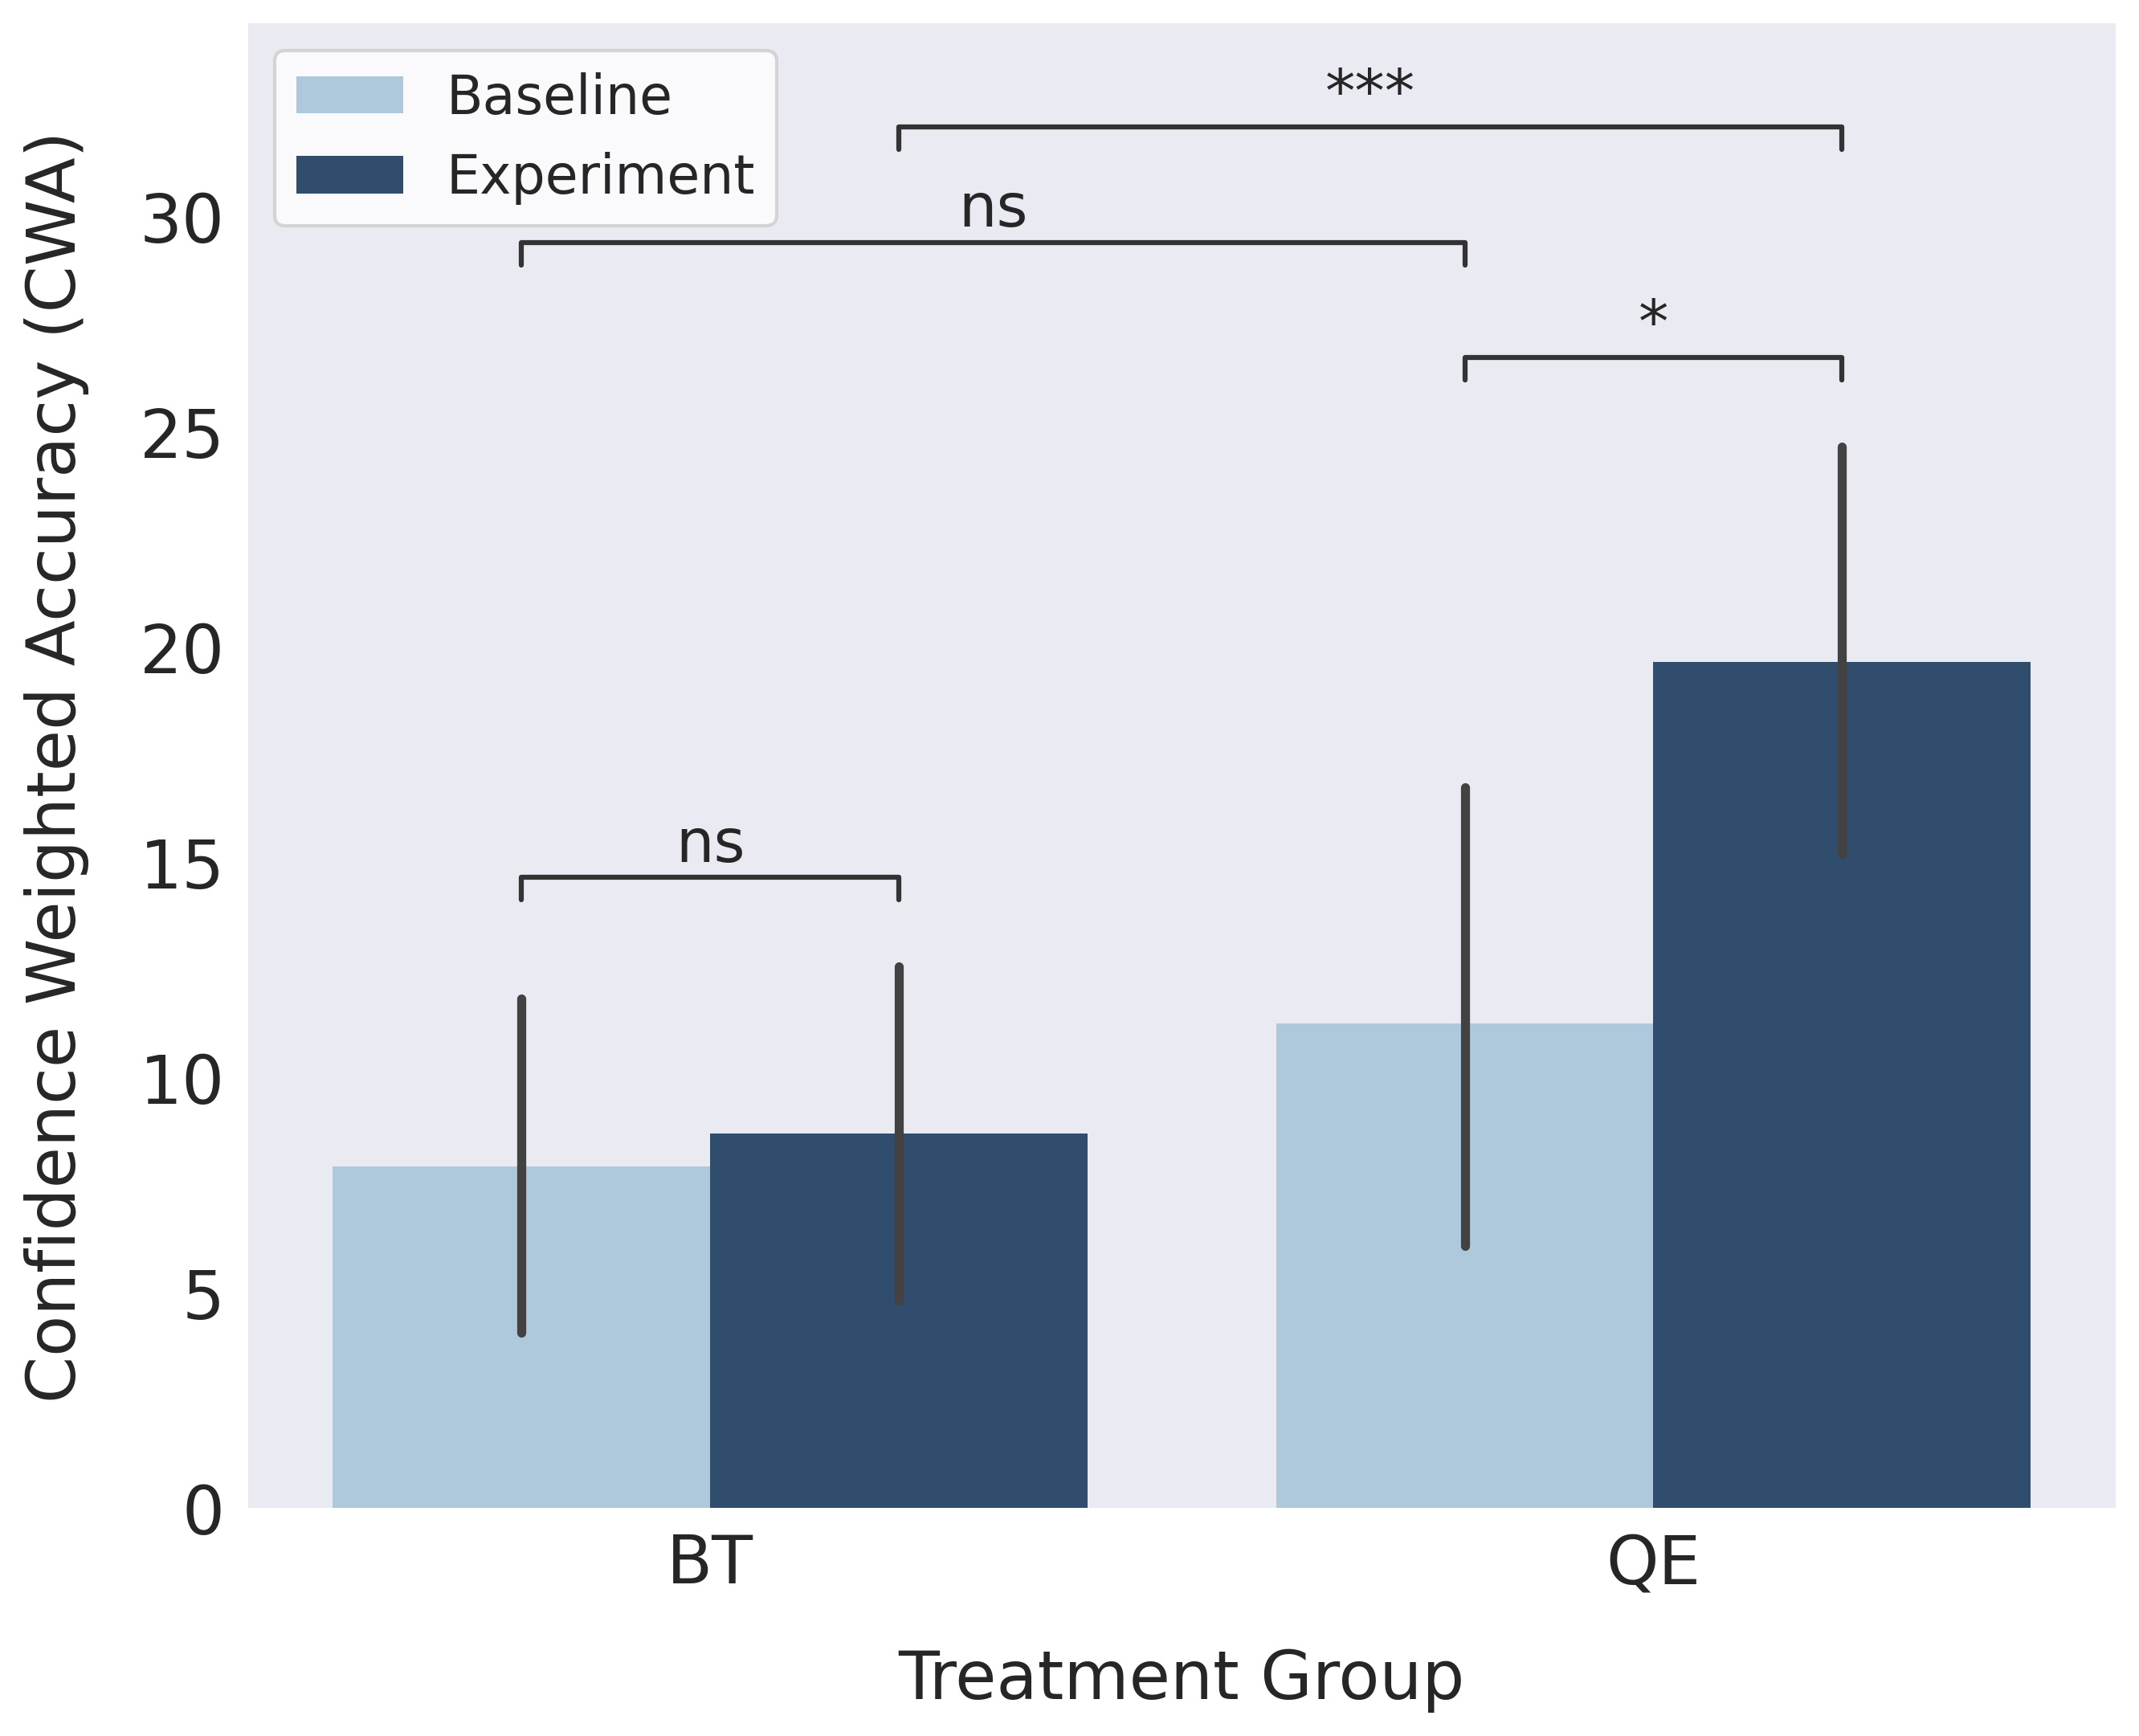

In [ ]:
from statannotations.Annotator import Annotator

sub_data = data[["Condition", "Baseline (Weighted Accuracy)", "Experiment (Weighted Accuracy)"]]
sub_data.columns = ["Condition", "Baseline", "Experiment"]

accuracy_phy_df = pd.melt(
    sub_data,
    id_vars=["Condition"],
    var_name="Group",
    value_name="Weighted Accuracy"
)

plt.figure(figsize=(10, 8))
#clrs = ['#9ea5ad', '#4374a2', '#9ea5ad', '#d68121']
modern_blues = ['#a6cbe3', '#274c77']
#ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Weighted Accuracy', hue='Group', palette=clrs)
ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Weighted Accuracy', hue='Group', palette=modern_blues, linewidth=0)
sns.set_style("whitegrid", {'axes.edgecolor': '0.9'})
legend = ax.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Group", title_fontsize=18, fontsize=16)
legend.get_frame().set_linewidth(0.0)
sns.despine(left=True, bottom=True, right=True)
ax.set_xlabel("Treatment Group", fontsize=20, labelpad=15)
ax.set_ylabel("Confidence Weighted Accuracy (CWA)", fontsize=20, labelpad=15)

pairs = [((xval, "Baseline"), (xval, "Experiment")) for xval in ["BT", "QE"]]
pairs += [(("BT", yval), ("QE", yval)) for yval in ["Baseline", "Experiment"]]

annotator = Annotator(ax, pairs, data=accuracy_phy_df, x="Condition", y="Weighted Accuracy", hue="Group", order=["BT", "QE"])
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator._pvalue_format.fontsize = 18
annotator.apply_and_annotate()

plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.xticks(fontsize=20)

#plt.xlabel(xlabel="Treatment Group", fontsize=16)
#plt.ylabel(ylabel="Confidence Weighted Accuracy (CWA)",fontsize=20)
plt.show()

In [ ]:
# weighted scoring - From Niloufar's code
def calculate_answer_specific_score(data, correct_answer, confidence_data, answer):
    overall_score = pd.Series(0, index=data.index)  # Initialize overall score to zero
    for idx, row in data.iterrows():  # Iterate over each row
        i = 0
        for col in row.index:
          if (correct_answer[i] == answer):
            if (row[col] == correct_answer[i]):  # Check condition
                overall_score[idx] += confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Add to overall score
            else:
                overall_score[idx] -= confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Subtract from overall score
          i += 1
    return overall_score

In [ ]:
# data[["Condition", "Baseline Yes (Weighted Accuracy)", "Experiment Yes (Weighted Accuracy)", "Baseline No (Weighted Accuracy)", "Experiment No (Weighted Accuracy)"]].groupby("Condition").mean()

In [ ]:
# data[["Condition", "Baseline Yes (Weighted Accuracy)", "Experiment Yes (Weighted Accuracy)", "Baseline No (Weighted Accuracy)", "Experiment No (Weighted Accuracy)"]].groupby("Condition").std()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:4.182e-02 t=-2.081e+00
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:2.723e-01 t=1.107e+00
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:5.898e-01 t=-5.418e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:4.327e-05 t=-4.396e+00


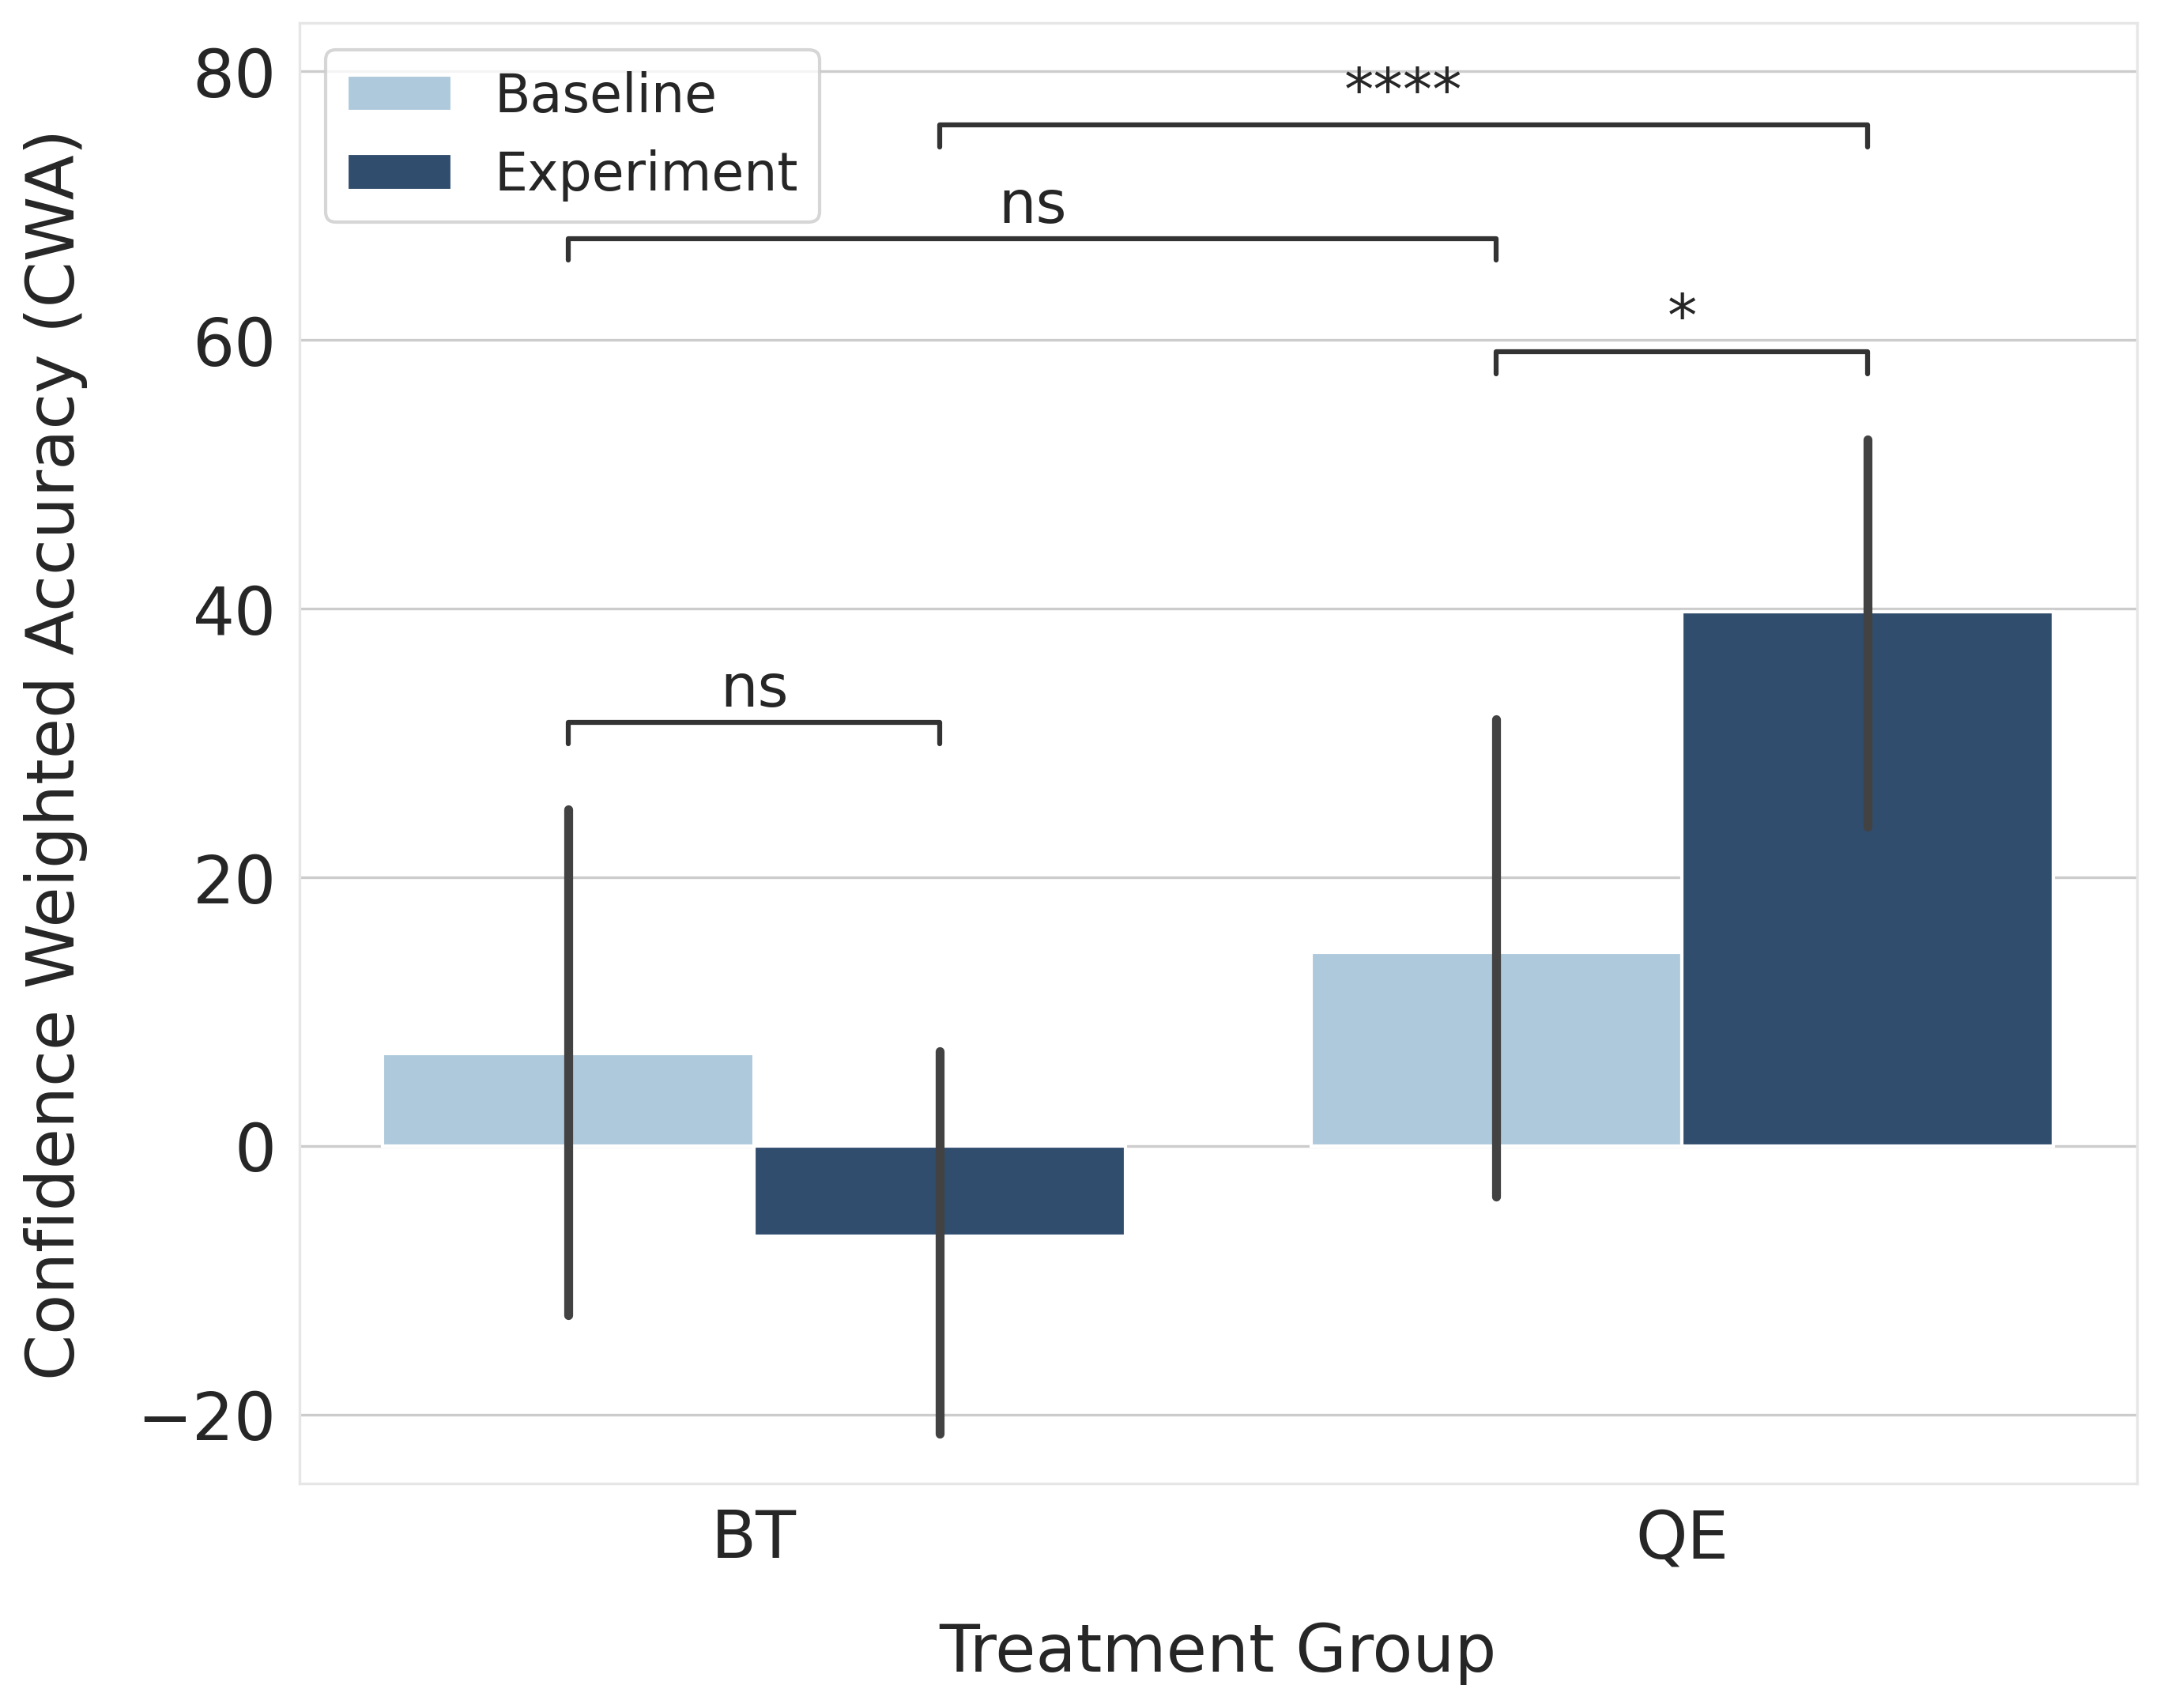

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:3.770e-01 t=8.902e-01
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:1.069e-01 t=-1.634e+00
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:9.076e-01 t=1.165e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:4.003e-03 t=2.988e+00


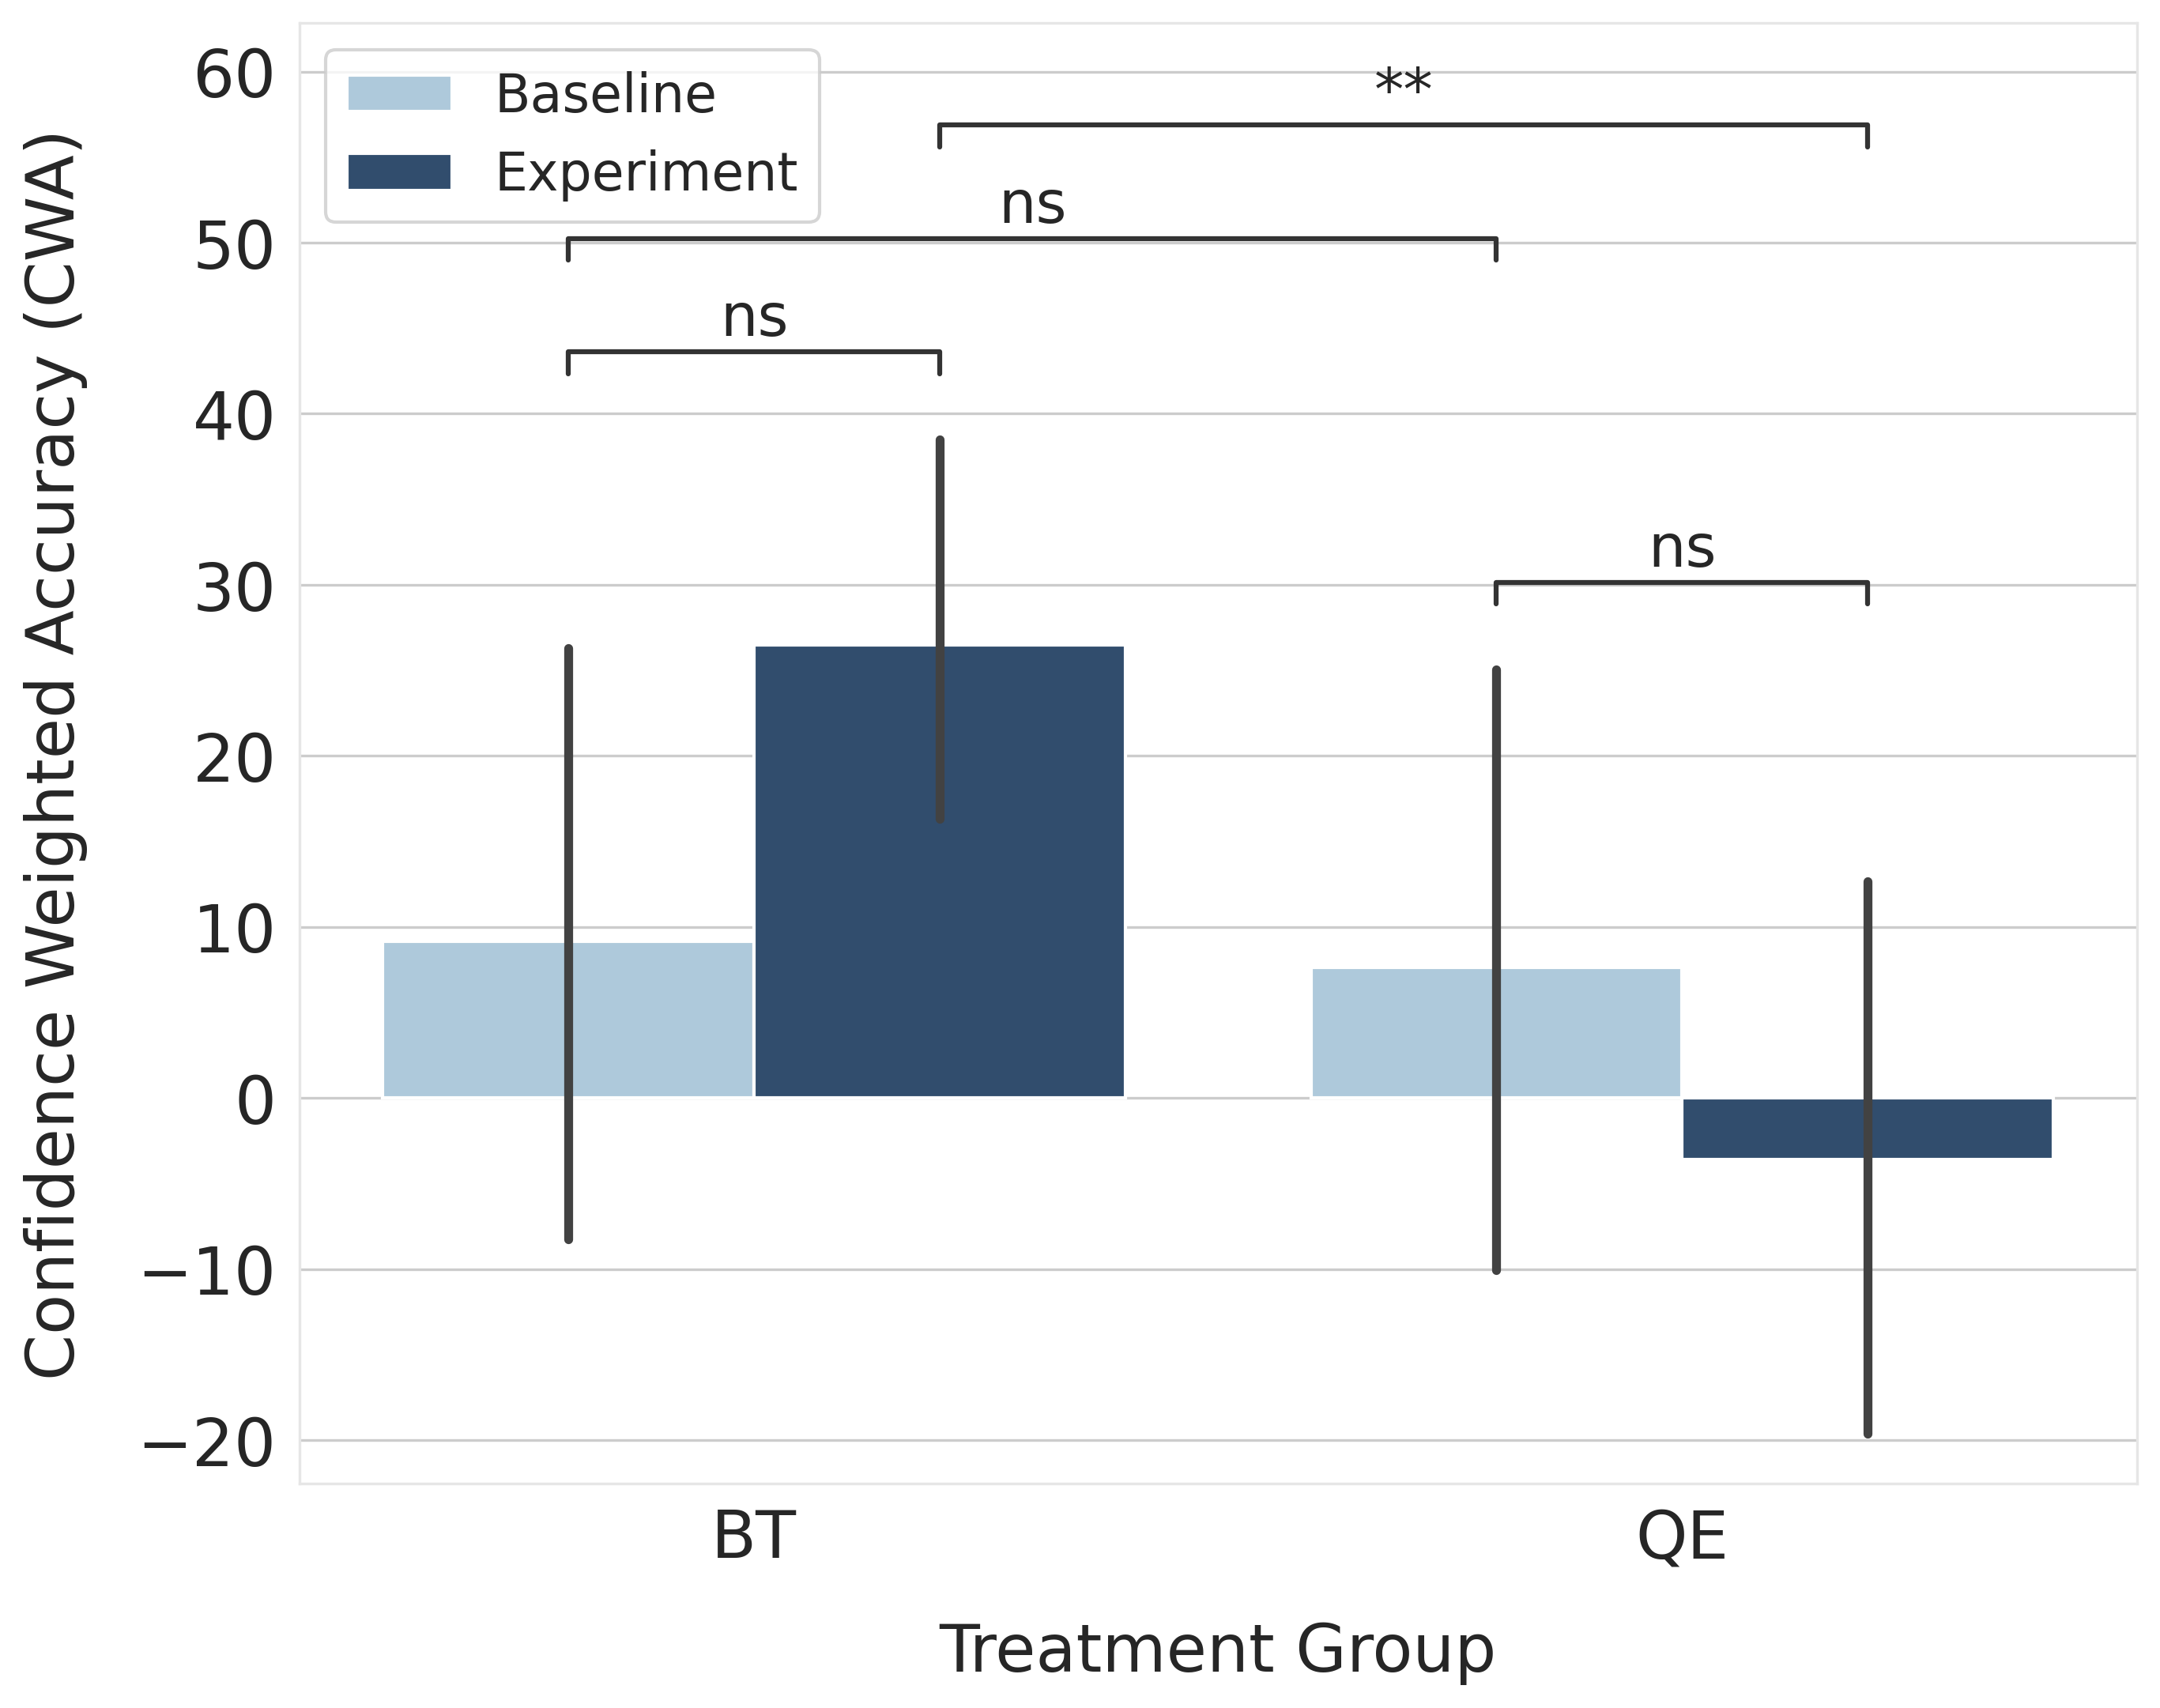

In [ ]:
# reliance on adequate and inadequate translations
for ans in ["Yes", "No"]:
  data[f"Baseline {ans} (Weighted Score)"] = calculate_answer_specific_score(data[["Baseline_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Baseline_confidence_{}".format(i) for i in range(1, 29)]], ans)
  data[f"Experiment {ans} (Weighted Score)"]  = calculate_answer_specific_score(data[["Experiment_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Experiment_confidence_{}".format(i) for i in range(1, 29)]], ans)

  data[f"Baseline {ans} (Weighted Accuracy)"] = (100*data[f"Baseline {ans} (Weighted Score)"])/count_ans[ans]
  data[f"Experiment {ans} (Weighted Accuracy)"] = (100*data[f"Experiment {ans} (Weighted Score)"])/count_ans[ans]

  sub_data = data[["Condition", f"Baseline {ans} (Weighted Accuracy)", f"Experiment {ans} (Weighted Accuracy)"]]
  sub_data.columns = ["Condition", "Baseline", "Experiment"]

  accuracy_phy_df = pd.melt(
      sub_data,
      id_vars=["Condition"],
      var_name="Group",
      value_name="Weighted Accuracy"
  )

  plt.figure(figsize=(10, 8))
  #clrs = ['#9ea5ad', '#4374a2', '#9ea5ad', '#d68121']
  modern_blues = ['#a6cbe3', '#274c77']
  ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Weighted Accuracy', hue='Group', palette=modern_blues)
  ax.set_xlabel("Treatment Group", fontsize=20, labelpad=15)
  ax.set_ylabel("Confidence Weighted Accuracy (CWA)", fontsize=20, labelpad=15)

  pairs = [((xval, "Baseline"), (xval, "Experiment")) for xval in ["BT", "QE"]]
  pairs += [(("BT", yval), ("QE", yval)) for yval in ["Baseline", "Experiment"]]

  annotator = Annotator(ax, pairs, data=accuracy_phy_df, x="Condition", y="Weighted Accuracy", hue="Group", order=["BT", "QE"])
  annotator.configure(test='t-test_ind', text_format='star', loc='inside')
  annotator._pvalue_format.fontsize = 18
  annotator.apply_and_annotate()

  plt.yticks(fontsize=20)
  plt.legend(loc=2, prop={'size': 16})
  plt.xticks(fontsize=20)

  #plt.xlabel(xlabel="Treatment Group", fontsize=16)
  #plt.ylabel(ylabel="Confidence Weighted Accuracy (CWA)",fontsize=20)
  plt.show()

# Risk

In [ ]:
# by sentence
sentence_accuracy = []
for group_name, group_df in data.groupby("Condition"):
  for i in range(1, 29):
    correct_ans_sent = correct_answers[i-1]
    experiment_ans = dict(group_df[f"Experiment_{i}"].value_counts())
    mean_confidence_correct = group_df[group_df[f"Experiment_{i}"] == correct_ans_sent][f"Experiment_confidence_{i}"].mean()
    if group_name=="BT":
      correct_percent = experiment_ans[correct_ans_sent]/35
    else:
      correct_percent = experiment_ans[correct_ans_sent]/30
    sentence_accuracy.append([group_name, i, correct_percent, mean_confidence_correct, correct_ans_sent, clinical_risk[i-1]])

sentence_df = pd.DataFrame(sentence_accuracy)
sentence_df.columns = ["Condition", "Sentence Id", "Physician Accuracy (%)", "Physician Confidence", "Adequate?", "Clinical Risk"]
sentence_df[ "Physician Accuracy (%)"] = sentence_df[ "Physician Accuracy (%)"] *100

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

highly significant_BT vs. highly significant_QE: t-test independent samples, P_val:2.982e-02 t=5.660e+00
life-threatening_BT vs. life-threatening_QE: t-test independent samples, P_val:nan t=nan
moderately significant_BT vs. moderately significant_QE: t-test independent samples, P_val:2.335e-02 t=2.673e+00
mildly significant_BT vs. mildly significant_QE: t-test independent samples, P_val:3.103e-01 t=-1.053e+00
insignificant_BT vs. insignificant_QE: t-test independent samples, P_val:2.021e-04 t=-4.534e+00


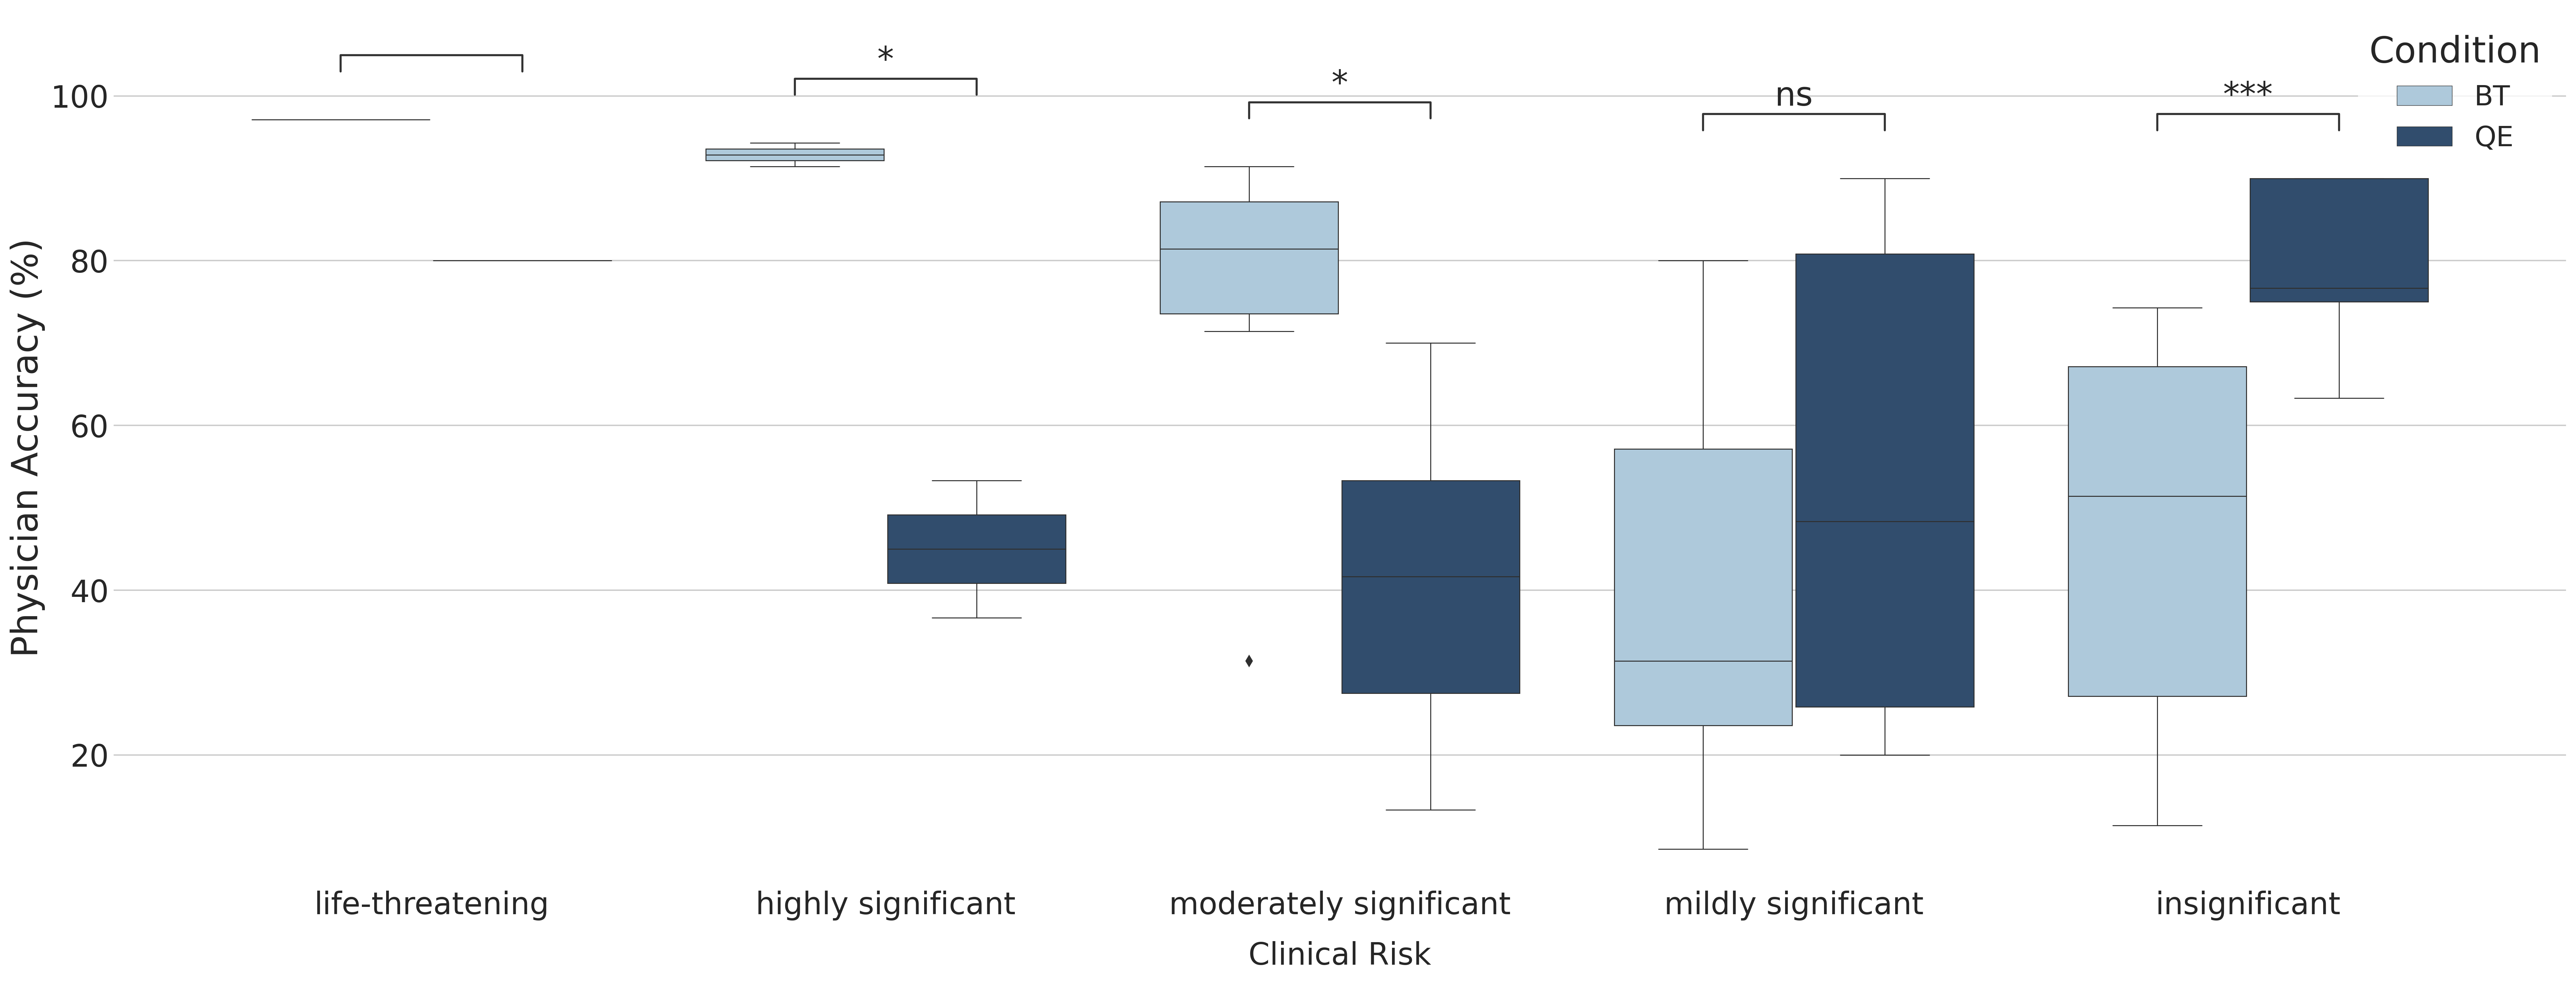

In [ ]:
from scipy import stats
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the font globally
sns.set(font="DejaVu Sans")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Modern Blues Color Palette
modern_blues = ['#a6cbe3', '#274c77']

xlabel = 'Clinical Risk'
ylabel = 'Physician Accuracy (%)'
sub_df = sentence_df
sub_df["Clinical Risk"] = sub_df["Clinical Risk"].str.replace("clinically insignificant", "insignificant")
figsize = (26, 10)  # Slightly reduced for better fit
order = ['life-threatening', 'highly significant', 'moderately significant', 'mildly significant', 'insignificant']
fontsize = 26

# Set the white grid style for the plot
sns.set_style("whitegrid", {'axes.edgecolor': '0.9'})

plt.figure(figsize=figsize)
ax = sns.boxplot(data=sub_df, x=xlabel, y=ylabel, hue="Condition", order=order, palette=modern_blues, linewidth=0.7, fliersize=5)

pairs = [((xval, "BT"), (xval, "QE")) for xval in order]
annotator = Annotator(ax, pairs, data=sub_df, x=xlabel, y=ylabel, hue="Condition", order=order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator._pvalue_format.fontsize = 24
annotator.apply_and_annotate()

# Remove unnecessary spines
sns.despine(bottom=True, left=True)

# Update font sizes for ticks, labels, and legend
ax.set_xlabel(xlabel, fontsize=fontsize-4, labelpad=15)
ax.set_ylabel(ylabel, fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize-4, length=0)
legend = ax.legend(loc="upper right", title="Condition", title_fontsize=fontsize, fontsize=fontsize-6)
legend.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.show()


# Trust in AI Systems

In [ ]:
 #Trust table in Discussion section
data.groupby('Condition')[["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]].mean().round(2)

,end_survey_Q5_1,end_survey_Q5_2,end_survey_Q5_3,end_survey_Q5_4
Condition,,,,
BT,2.69,1.63,3.69,1.94
QE,3.13,2.67,4.10,3.20


In [ ]:
BT_qmap = {
    "end_survey_Q5_1": "I am confident in Google Translate. I feel that it works well.",
    "end_survey_Q5_2": "Google Translate is very reliable. I can count on it to be correct all the time.",
    "end_survey_Q5_3": "I would use AI systems in my clinical practice if endorsed by a medical board.",
    "end_survey_Q5_4": "I like using Google Translate for decision-making."
}

In [ ]:
QE_qmap = {
    "end_survey_Q5_1": "I am confident in the Quality Estimation system. I feel that it works well.",
    "end_survey_Q5_2": "The Quality Estimation system is very reliable. I can count on it to be correct all the time.",
    "end_survey_Q5_3": "I would use AI systems in my clinical practice if endorsed by a medical board.",
    "end_survey_Q5_4": "I like using the Quality Estimation system for decision-making."
}

In [ ]:
! pip install plot_likert

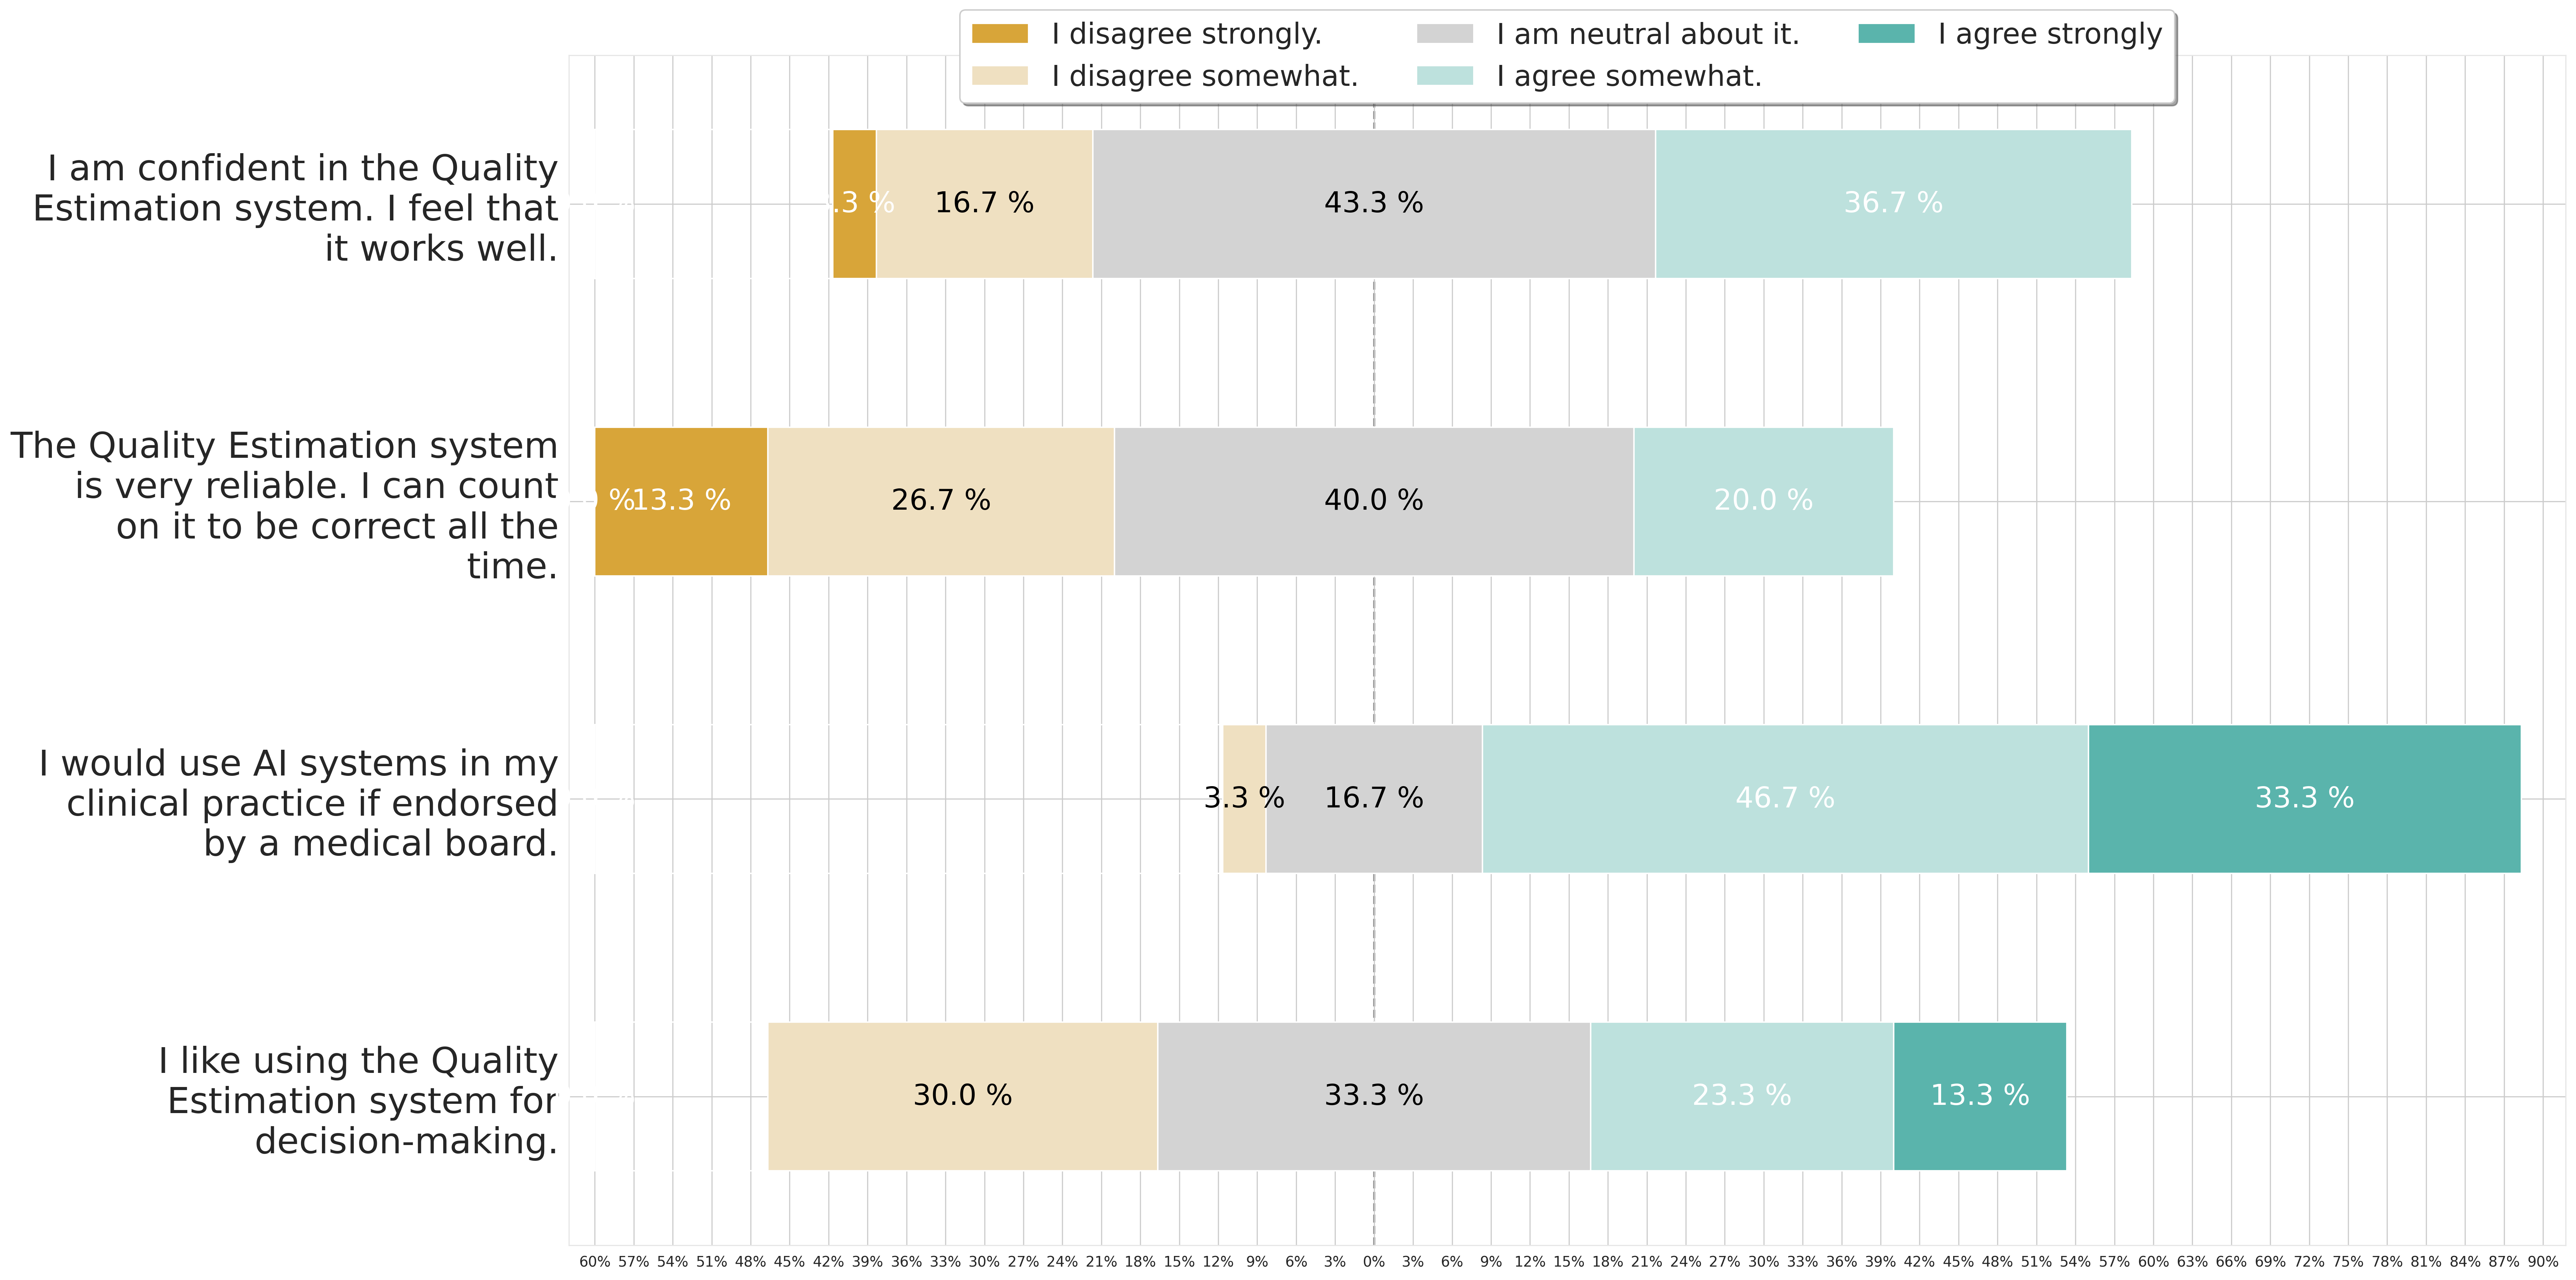

In [ ]:
from numpy.core import numeric
import plot_likert
import pandas as pd

category_names = ["I disagree strongly.", "I disagree somewhat.", "I am neutral about it.",  "I agree somewhat.", "I agree strongly"]
sub_df = data[data.Condition == "QE"][["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]]

for col in ["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]:
  sub_df[QE_qmap[col]] = sub_df[col].apply(lambda x: category_names[x-1])


ax1  = plot_likert.plot_likert(sub_df[QE_qmap.values()], category_names, plot_percentage=True, figsize=(25,15), colors=plot_likert.colors.likert5)
ax1.tick_params(axis='y', labelsize= 25)
ax1.set(xlabel=None)
for bars, color in zip(ax1.containers[1:], ['white'] + ['black'] * 2 + ['white'] * 2):
    ax1.bar_label(bars, label_type='center', fmt='%.1f %%', color=color, fontsize=20)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True, fontsize=20)

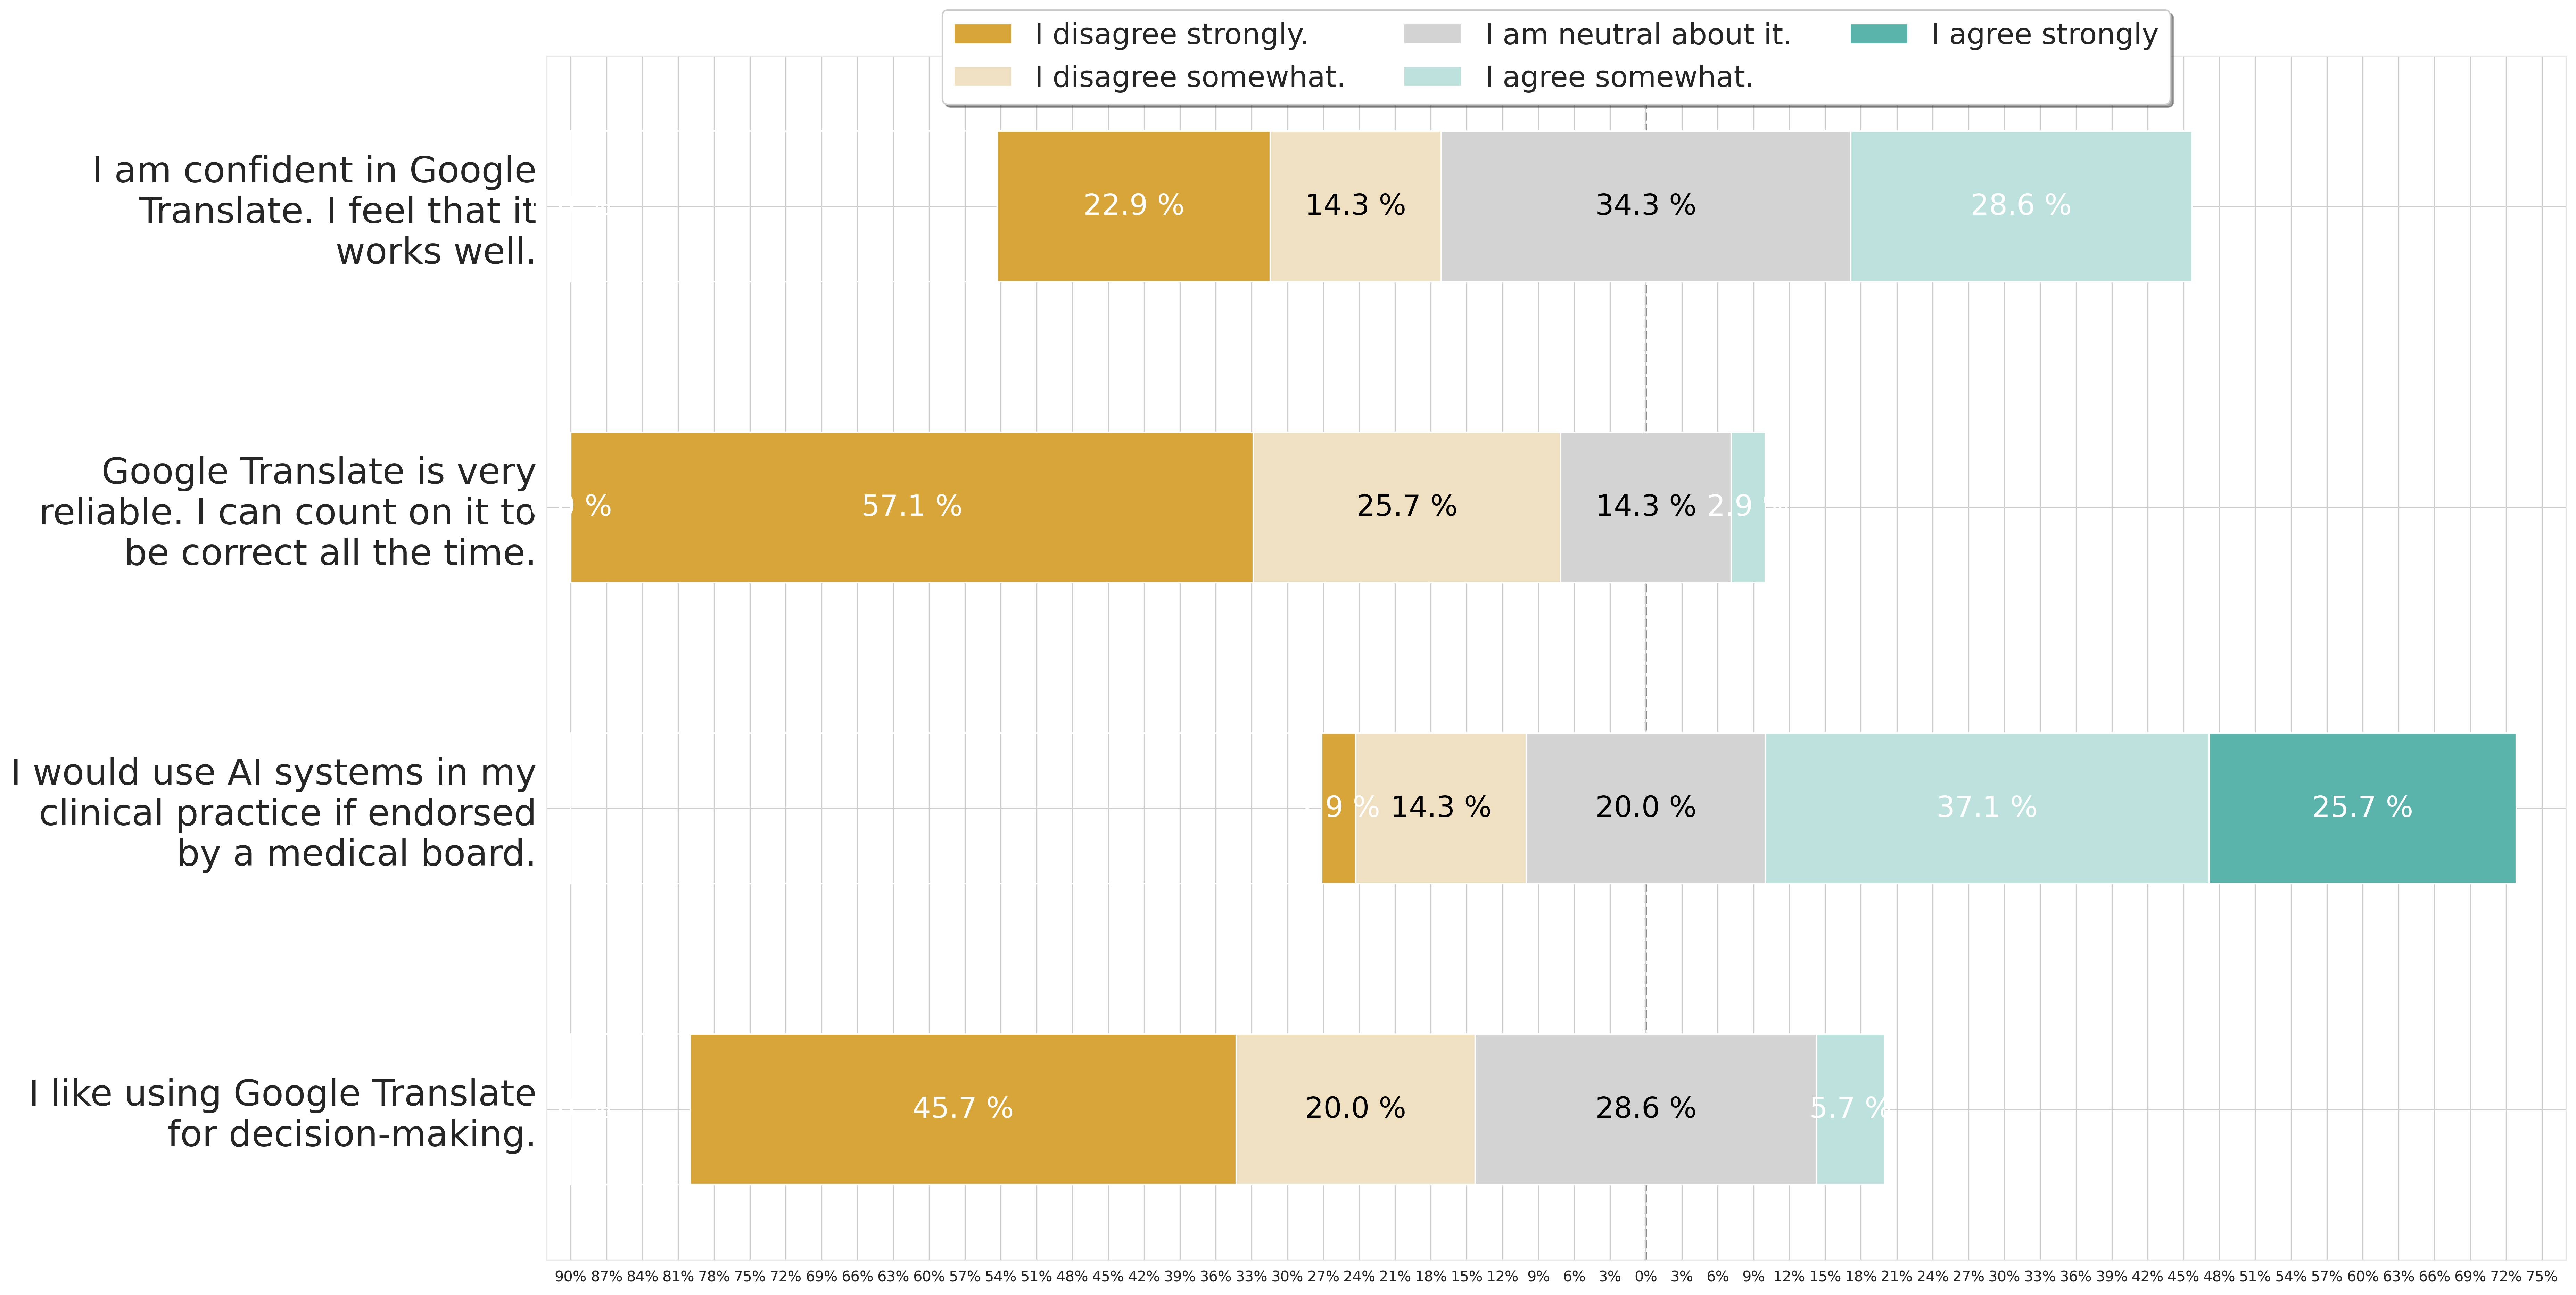

In [ ]:
from numpy.core import numeric
import plot_likert
import pandas as pd

category_names = ["I disagree strongly.", "I disagree somewhat.", "I am neutral about it.",  "I agree somewhat.", "I agree strongly"]
sub_df = data[data.Condition == "BT"][["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]]

for col in ["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]:
  sub_df[BT_qmap[col]] = sub_df[col].apply(lambda x: category_names[x-1])


ax1  = plot_likert.plot_likert(sub_df[BT_qmap.values()], category_names, plot_percentage=True, figsize=(25,15), colors=plot_likert.colors.likert5)
ax1.tick_params(axis='y', labelsize= 25)
ax1.set(xlabel=None)
for bars, color in zip(ax1.containers[1:], ['white'] + ['black'] * 2 + ['white'] * 2):
    ax1.bar_label(bars, label_type='center', fmt='%.1f %%', color=color, fontsize=20)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True, fontsize=20)

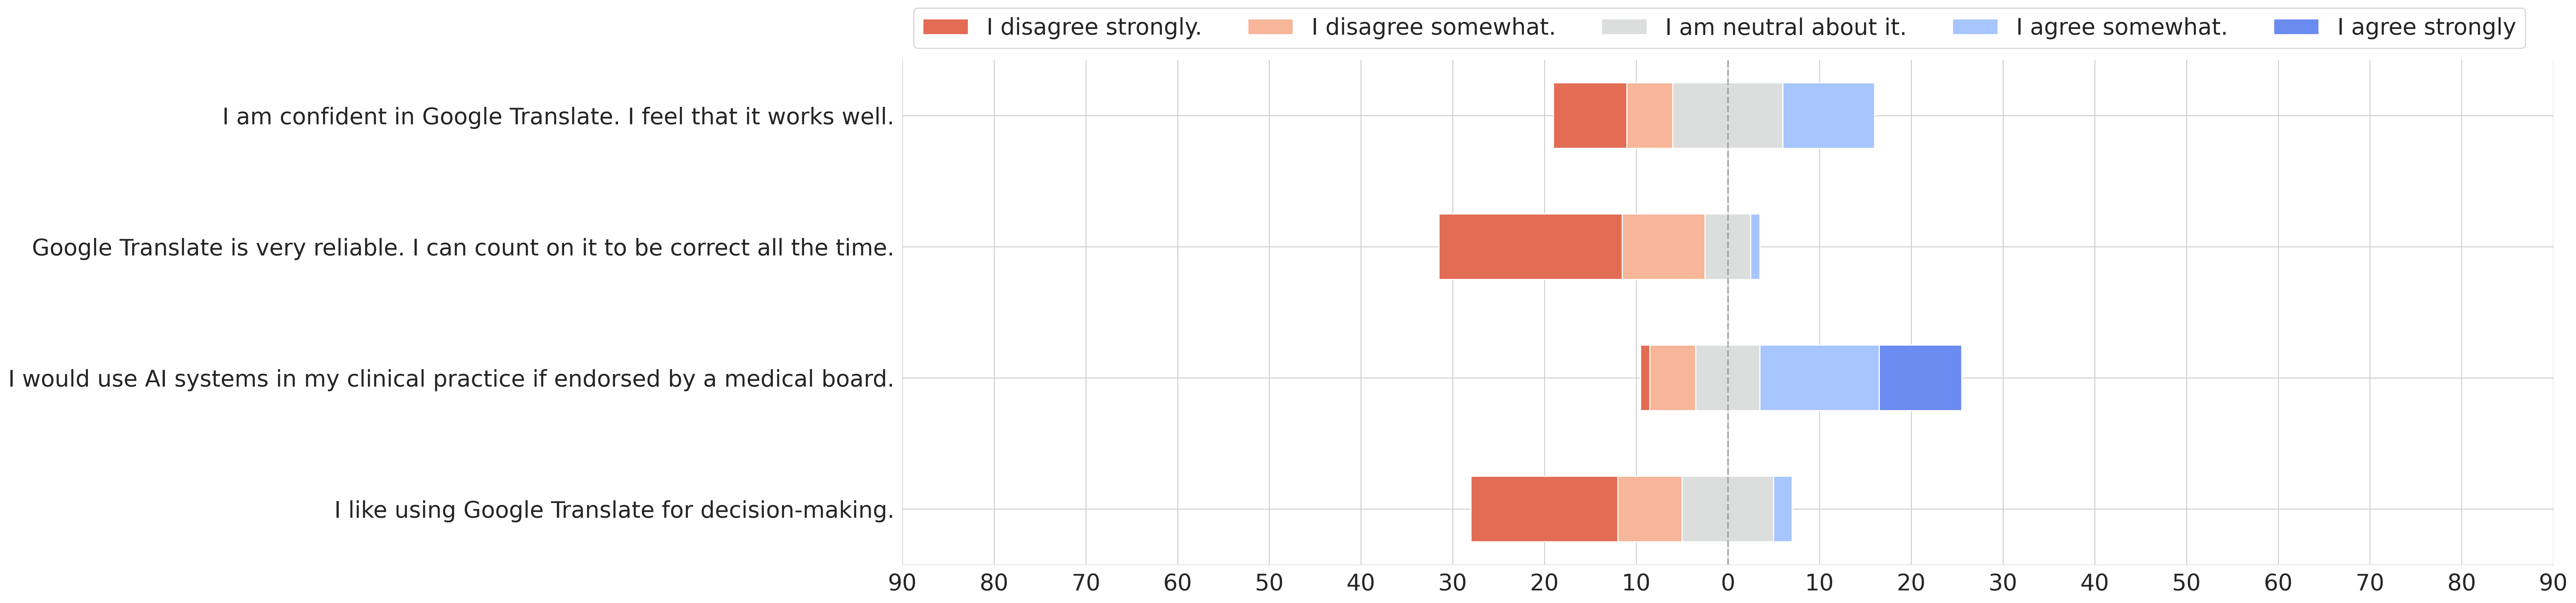

In [ ]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(26, 8))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
      widths = data[:, i]
      starts = data_cum[:, i] - widths - offsets
      rects = ax.barh(labels, widths, left=starts, height=0.5,
                      label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-90, 91, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=20)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax

results = {}
for col in ["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]:
  counts = data[data.Condition == "BT"][col].value_counts()
  results[BT_qmap[col]] = [counts[x] if x in counts else 0 for x in range(1, 6) ]

category_names = ["I disagree strongly.", "I disagree somewhat.", "I am neutral about it.",  "I agree somewhat.", "I agree strongly"]
fig, ax = survey(results, category_names)
plt.show()

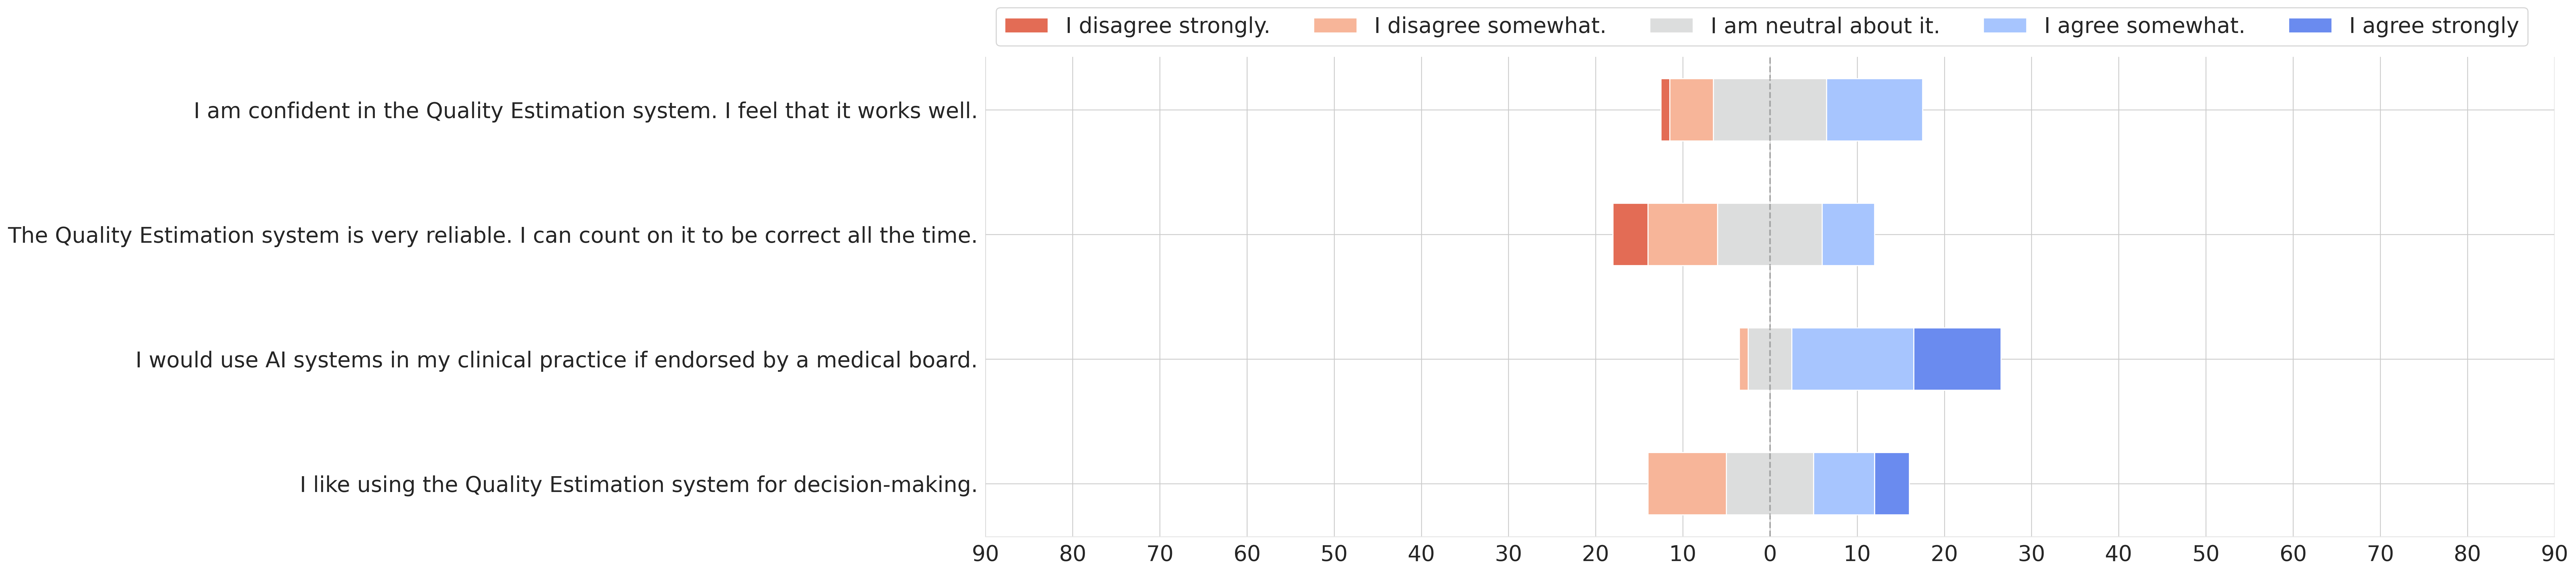

In [ ]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(26, 8))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-90, 91, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=20)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax

results = {}
for col in ["end_survey_Q5_1", "end_survey_Q5_2", "end_survey_Q5_3", "end_survey_Q5_4"]:
  counts = data[data.Condition == "QE"][col].value_counts()
  results[QE_qmap[col]] = [counts[x] if x in counts else 0 for x in range(1, 6) ]


category_names = ["I disagree strongly.", "I disagree somewhat.", "I am neutral about it.",  "I agree somewhat.", "I agree strongly"]
fig, ax = survey(results, category_names)
plt.show()